In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
holidays = pd.read_csv("./holidays_events.csv")
oil = pd.read_csv("./oil.csv")
stores = pd.read_csv("./stores.csv")
transactions = pd.read_csv("./transactions.csv")
train = pd.read_csv("./train.csv")

In [106]:
train_merged = train.copy()
train_merged = train_merged.merge(stores, on='store_nbr', how='left')
train_merged = train_merged.merge(holidays, on='date', how='left')
train_merged = train_merged.merge(oil, on='date', how='left')
train_merged = train_merged.merge(transactions, on=['store_nbr', 'date'], how='left')
train_merged.rename(columns={'type_x': 'type_store', 'type_y': 'type_holiday'}, inplace=True)
train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_store,cluster,type_holiday,locale,locale_name,description,transferred,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN


In [107]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type_store    object 
 9   cluster       int64  
 10  type_holiday  object 
 11  locale        object 
 12  locale_name   object 
 13  description   object 
 14  transferred   object 
 15  dcoilwtico    float64
 16  transactions  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 396.1+ MB


In [108]:
train_merged.describe(include=['object'])

,date,family,city,state,type_store,type_holiday,locale,locale_name,description,transferred
count,3054348,3054348,3054348,3054348,3054348,502524,502524,502524,502524,502524
unique,1684,33,22,16,5,6,3,24,101,2
top,2014-06-25,AUTOMOTIVE,Quito,Pichincha,D,Holiday,National,Ecuador,Carnaval,False
freq,7128,92556,1018116,1074678,1018116,304722,261954,261954,17820,486486


In [109]:
train_merged.set_index('date', inplace=True)
average_daily_sales = train_merged.groupby(train_merged.index)["sales"].mean()
average_daily_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Name: sales, dtype: float64

In [110]:
sns.set_style("whitegrid")

plt.rc(
    "figure",
    autolayout=True,
    figsize=(20, 7),
    titleweight="bold",
    titlesize=18,
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10, 
)

%config InlineBackend.figure_format = "retina" # increase resolution

plot_params = dict(
    style=".-",
    color="0.75",
    markerfacecolor="0.25",
    markeredgecolor="0.25",
)

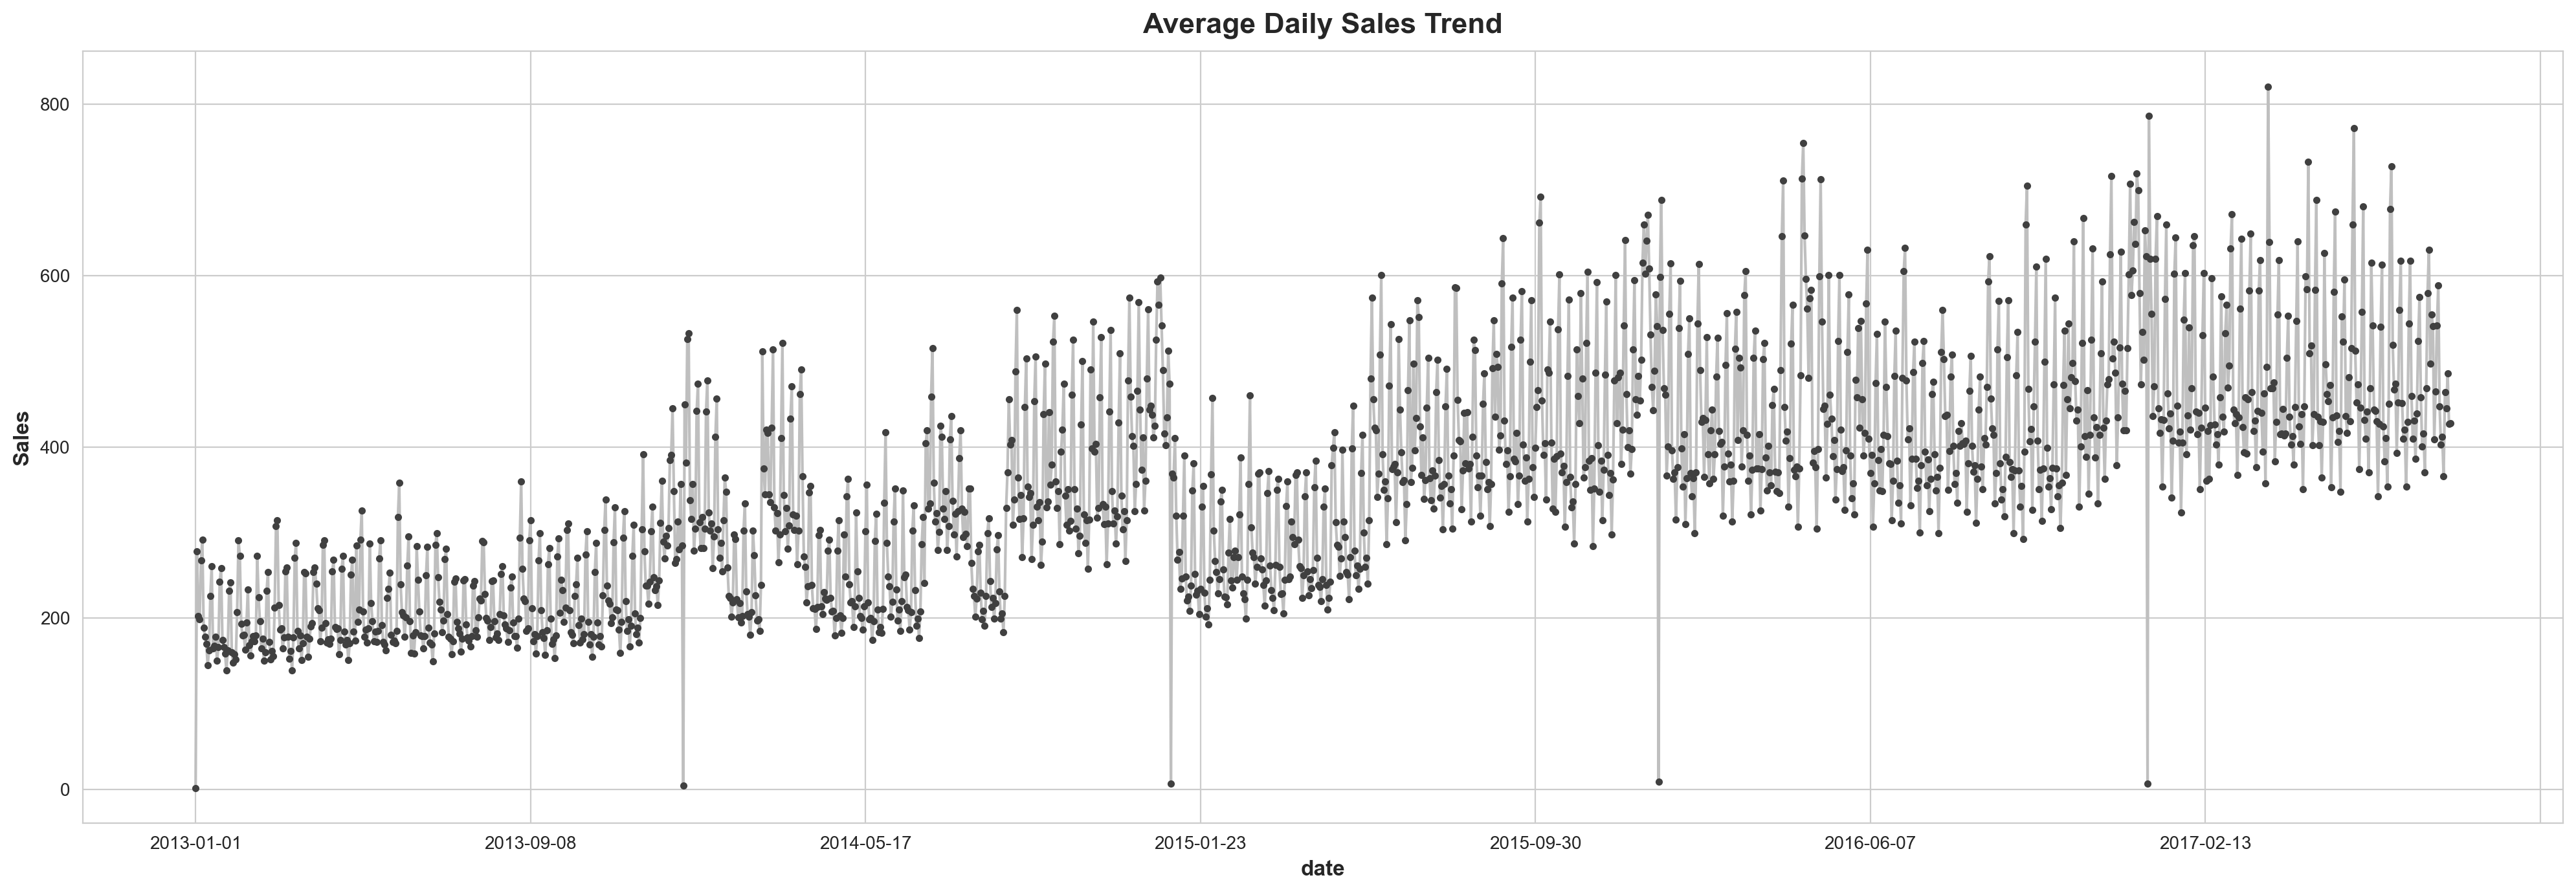

In [111]:
fig, ax = plt.subplots()
average_daily_sales.plot(**plot_params)
ax.set(title="Average Daily Sales Trend", ylabel="Sales");

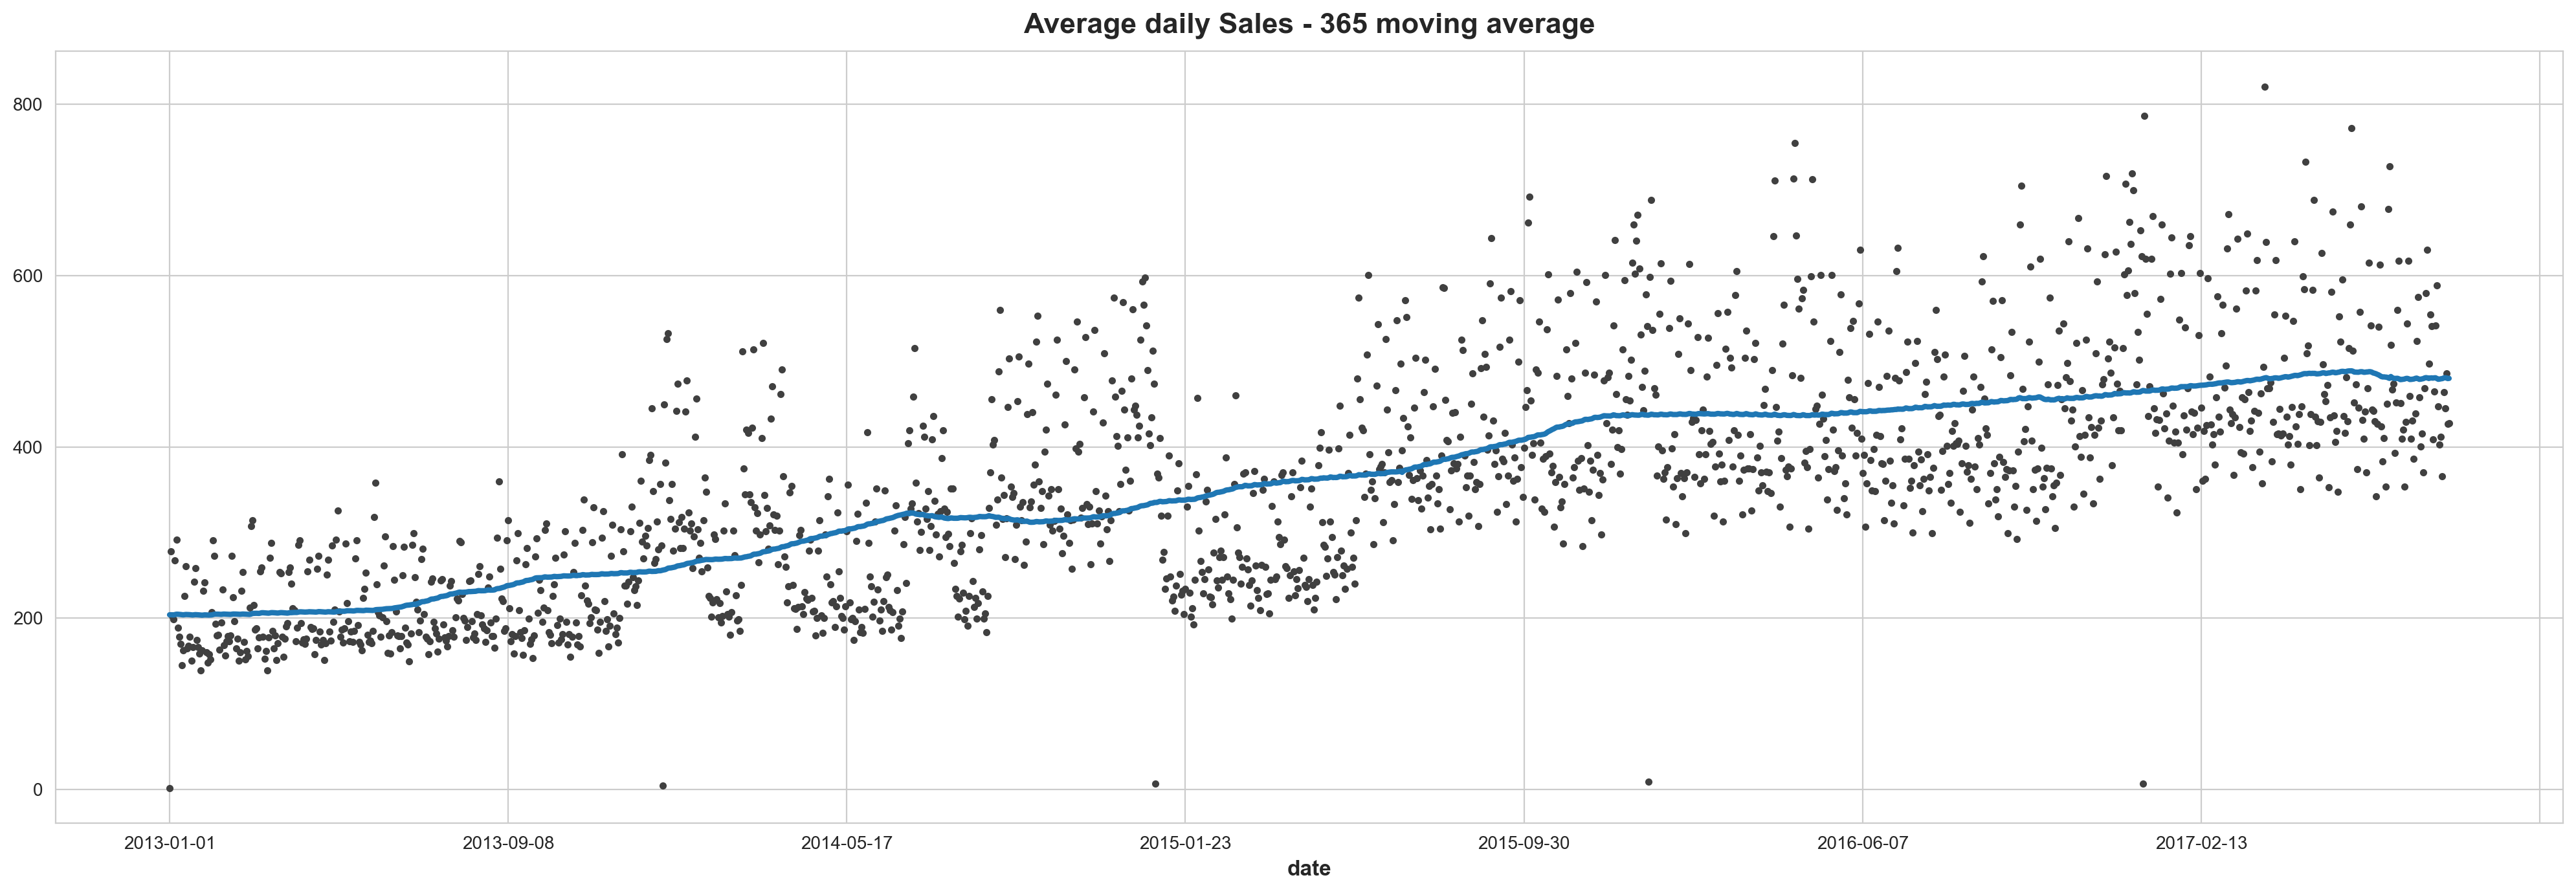

In [112]:
## compute moving average
moving_average = average_daily_sales.rolling(
    window=365, # series is daily observations; window size of 365 smooth out short-term fluctuations in series
    min_periods=183, # half of window size is okay. 
    center=True
).mean()
## moving average plot

ax = average_daily_sales.plot(style=".", color="0.25")
moving_average.plot(
                    ax=ax,
                    linewidth=3, 
                    title="Average daily Sales - 365 moving average", 
                    );
                    

In [113]:
# train_merged['year'] = train_merged['date'].dt.year
# train_merged['month'] = train_merged['date'].dt.month
# train_merged['day'] = train_merged['date'].dt.day
# train_merged['weekday'] = train_merged['date'].dt.weekday


In [114]:
train_merged

,id,store_nbr,family,sales,onpromotion,city,state,type_store,cluster,type_holiday,locale,locale_name,description,transferred,dcoilwtico,transactions
date,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2013-01-01,1,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2013-01-01,2,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2013-01-01,3,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2013-01-01,4,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0
2017-08-15,3000885,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0


In [115]:
# # Step 1: Convert to datetime (if not already)

# # Step 2: Create a 'year-month' column
# train_merged['year_month'] = train_merged['date'].dt.to_period('M')

# # Step 3: Aggregate by year-month
# monthly_transactions = train_merged.groupby('year_month')['transactions'].sum().reset_index()

# # Step 4: Convert Period to string for plotting
# monthly_transactions['year_month'] = monthly_transactions['year_month'].astype(str)

# # Step 5: Plot
# monthly_transactions.plot(
#     x='year_month', 
#     y='transactions', 
#     kind='line', 
#     figsize=(15, 5), 
#     title='Monthly Transactions Over Time',
#     xlabel='Year-Month',
#     ylabel='Total Transactions'
# )


In [116]:
# train_merged['year_month'] = train_merged['date'].dt.to_period('M')

# # Step 3: Aggregate by year-month
# monthly_sales = train_merged.groupby('year_month')['sales'].sum().reset_index()

# # Step 4: Convert Period to string for plotting
# monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# # Step 5: Plot
# monthly_sales.plot(
#     x='year_month', 
#     y='sales', 
#     kind='line', 
#     figsize=(15, 5), 
#     title='Monthly Sales Over Time',
#     xlabel='Year-Month',
#     ylabel='Total Sales'
# )


In [117]:
train_merged.describe(include='object')

,family,city,state,type_store,type_holiday,locale,locale_name,description,transferred
count,3054348,3054348,3054348,3054348,502524,502524,502524,502524,502524
unique,33,22,16,5,6,3,24,101,2
top,AUTOMOTIVE,Quito,Pichincha,D,Holiday,National,Ecuador,Carnaval,False
freq,92556,1018116,1074678,1018116,304722,261954,261954,17820,486486


In [118]:
train_merged['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [119]:
train_merged.isnull().sum()/len(train_merged) * 100

id               0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
city             0.000000
state            0.000000
type_store       0.000000
cluster          0.000000
type_holiday    83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
dcoilwtico      31.271879
transactions     8.156143
dtype: float64

In [120]:
train_merged.drop(columns=['id','type_holiday','locale','locale_name','description','transferred'], inplace=True)

In [121]:
train_merged.isnull().sum()

store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_store           0
cluster              0
dcoilwtico      955152
transactions    249117
dtype: int64

In [122]:
store_sales = pd.read_csv("./train.csv", 
                   dtype={
                       "store_nbr":"category", 
                       "family":"category",
                       "sales":"float64",
                        "onpromotion":"int32"
                       }, 
                   usecols=["store_nbr", "family", "date", "sales", "onpromotion"],
                   parse_dates=["date"], index_col=False)

In [123]:
store_sales["date"] = store_sales.date.dt.to_period("D") # change DatetimeIndex to PeriodIndex
store_sales = store_sales.set_index(["store_nbr", "family", "date"]).sort_index()
store_sales

sales  onpromotion
store_nbr family     date                              
1         AUTOMOTIVE 2013-01-01   0.000000            0
                     2013-01-02   2.000000            0
                     2013-01-03   3.000000            0
                     2013-01-04   3.000000            0
                     2013-01-05   5.000000            0
...                                    ...          ...
9         SEAFOOD    2017-08-11  23.831000            0
                     2017-08-12  16.859001            4
                     2017-08-13  20.000000            0
                     2017-08-14  17.000000            0
                     2017-08-15  16.000000            0

[3000888 rows x 2 columns]

In [124]:
store_nbr = "1"
family = "AUTOMOTIVE"

store_sales.loc[(store_nbr, family, slice(None))]

,sales,onpromotion
date,,
2013-01-01,0.0,0
2013-01-02,2.0,0
2013-01-03,3.0,0
2013-01-04,3.0,0
2013-01-05,5.0,0
...,...,...
2017-08-11,1.0,0
2017-08-12,6.0,0
2017-08-13,1.0,0


In [125]:
## average sales
average_sales = store_sales.groupby("date")["sales"].mean()
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 1684, dtype: float64

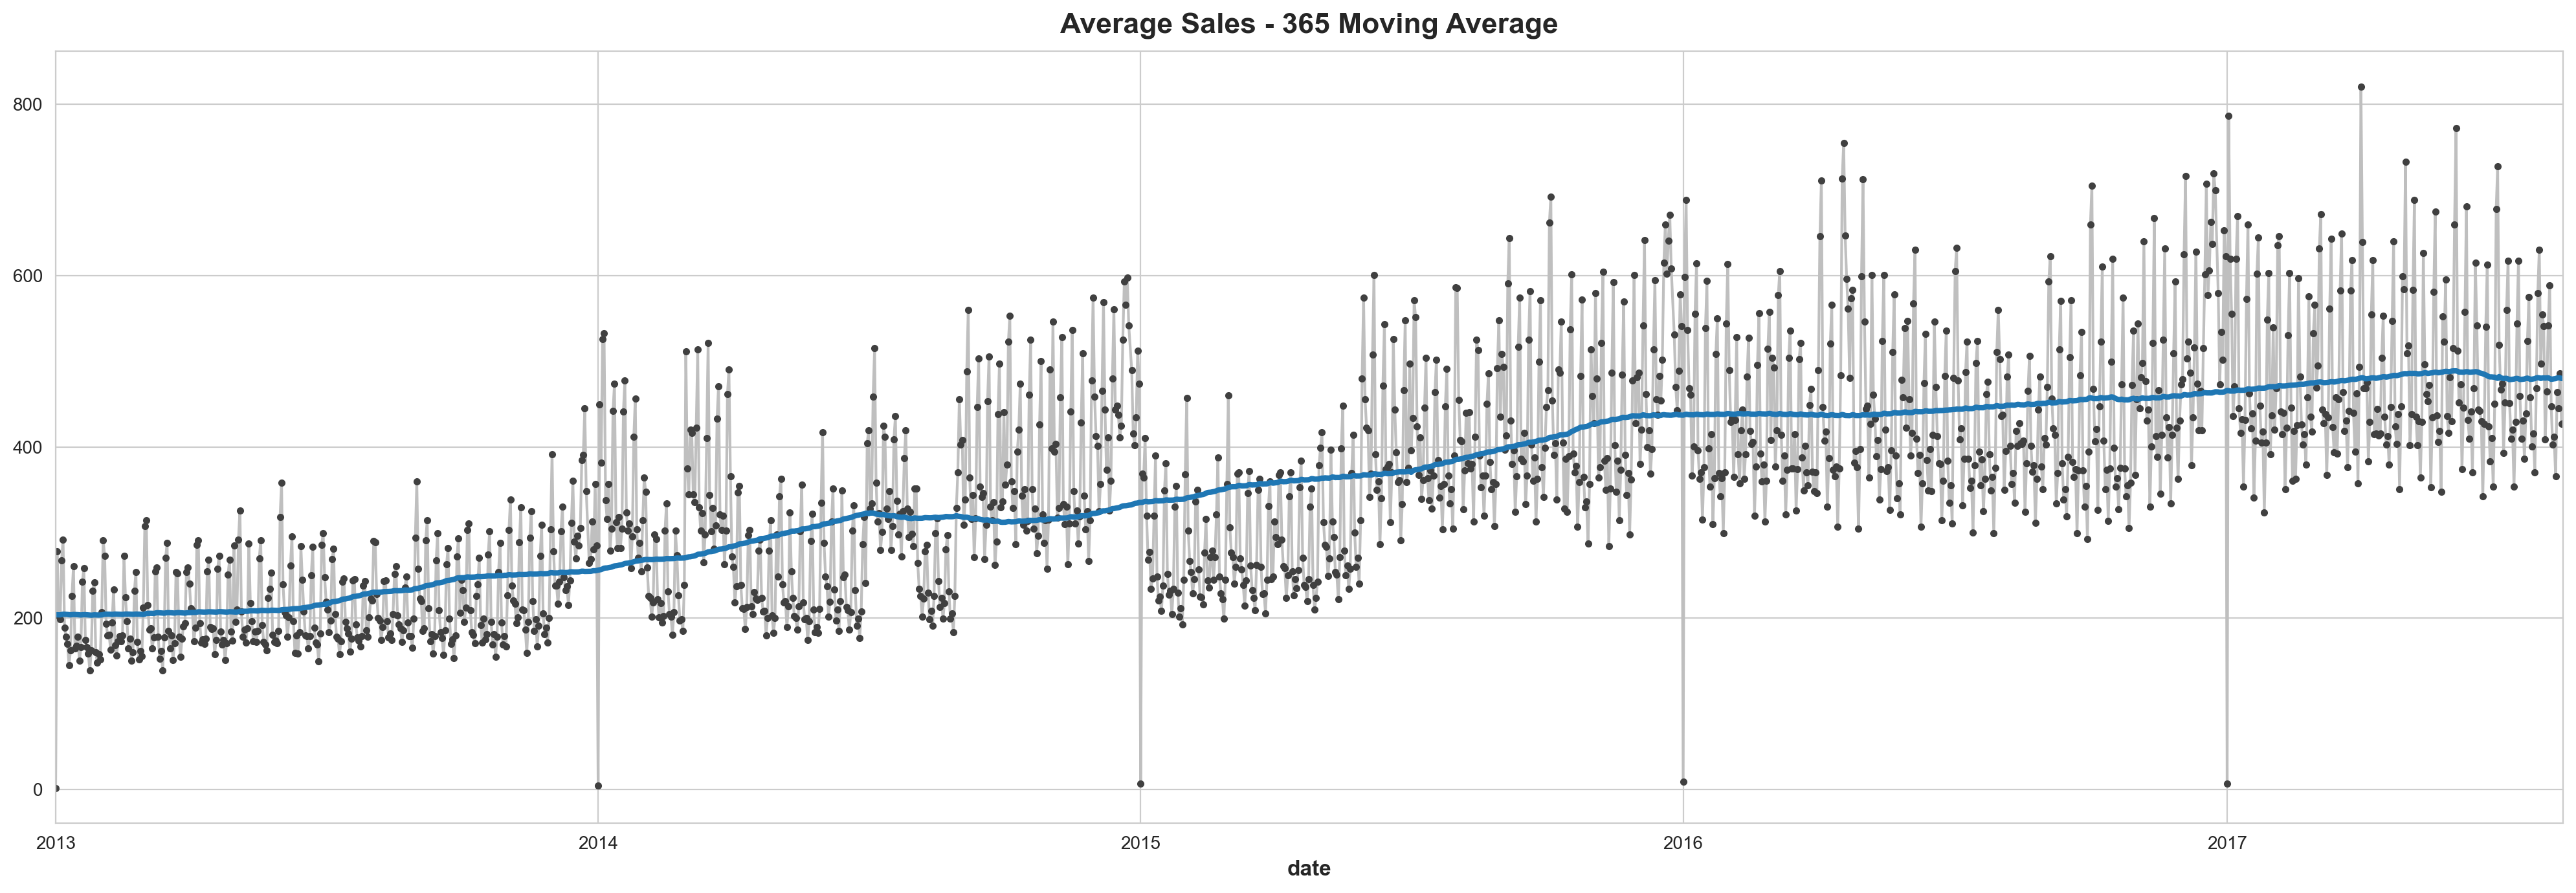

In [126]:
## estimate trend using moving average plot

trend = average_sales.rolling(
    window=365,    # smooth out short-term fluctuations within the year 
    center=True,
    min_periods=183, # min non null values in window to compute average. using half of window size
).mean()


# create MA plot
ax = average_sales.plot(**plot_params)
trend.plot(ax=ax, linewidth=3, legend=False, title="Average Sales - 365 Moving Average");

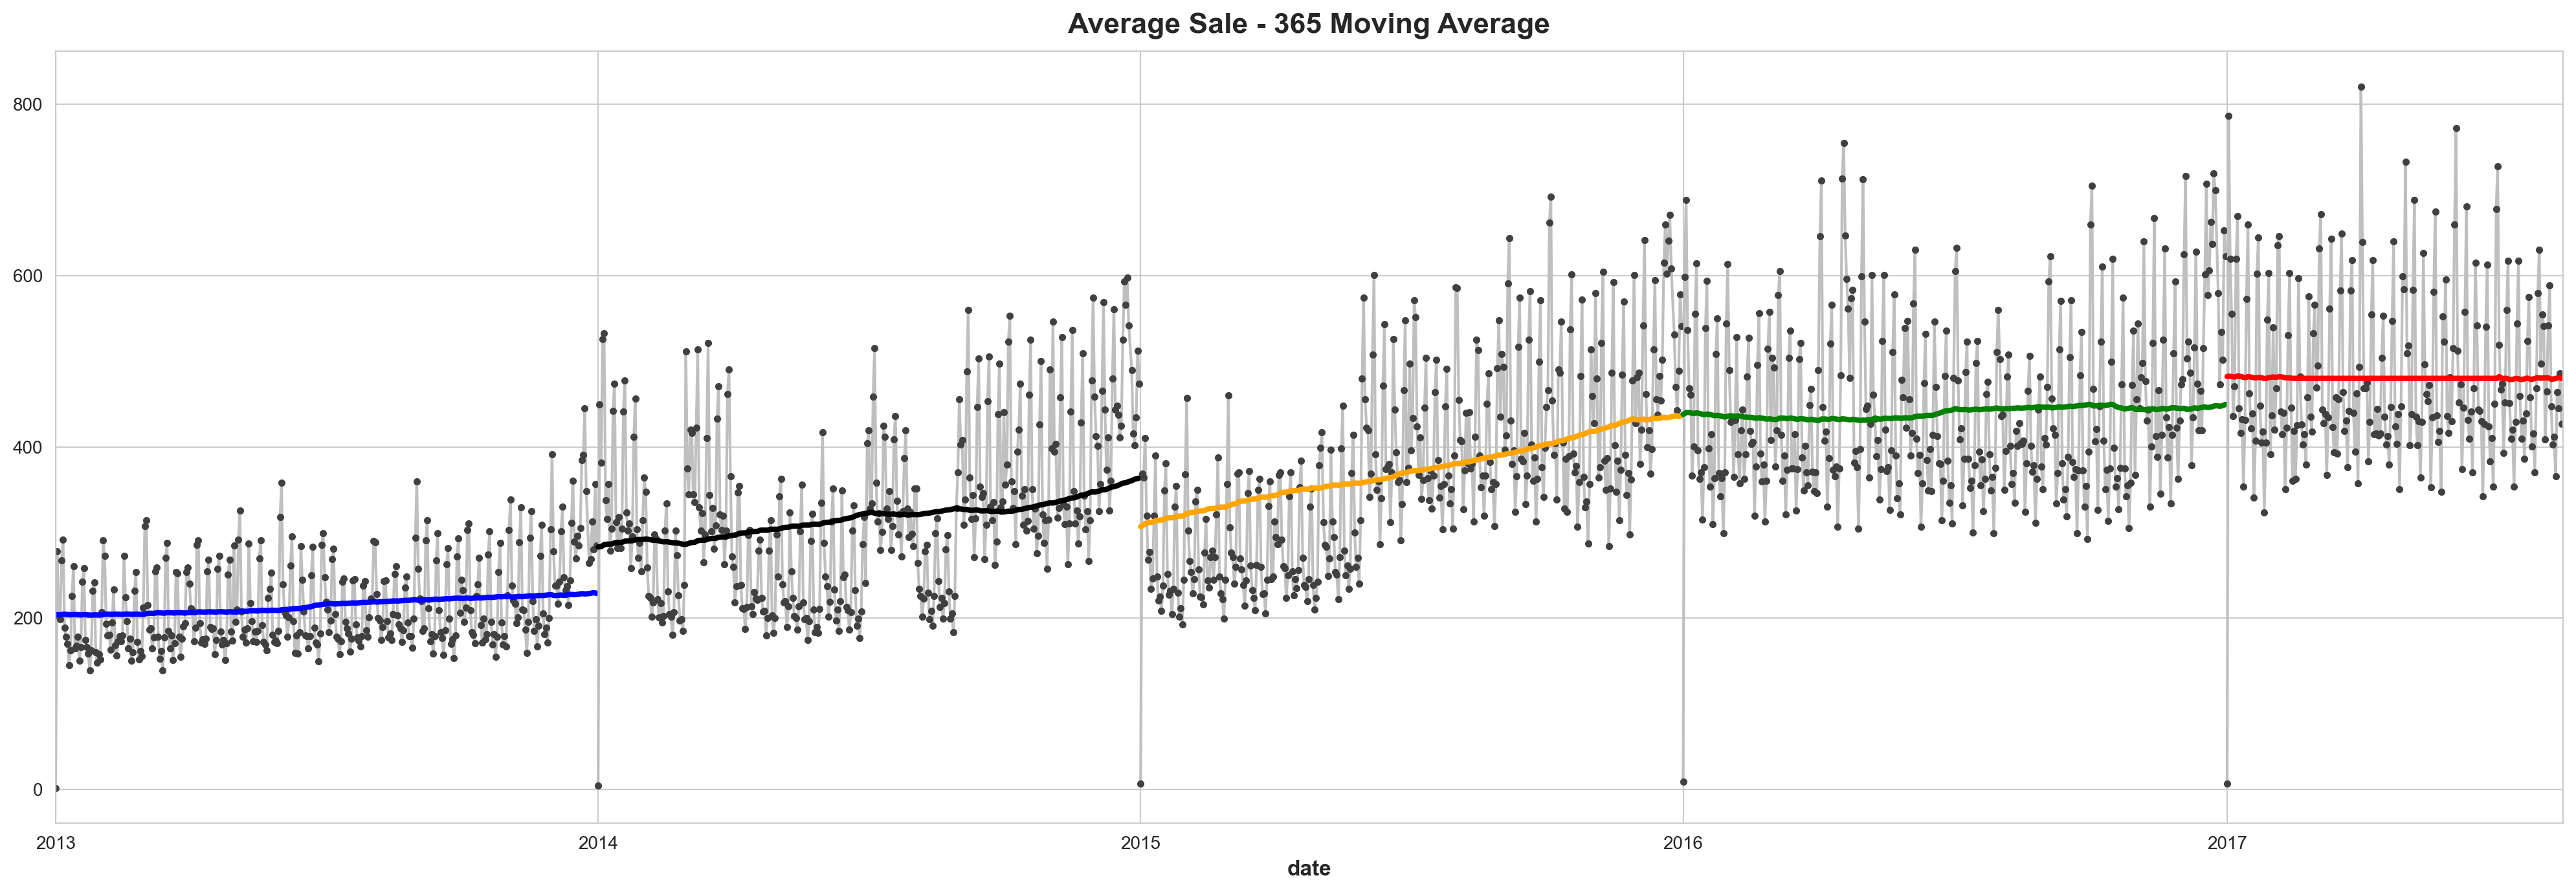

In [127]:
fig, ax = plt.subplots()
colors = ["blue", "black", "orange", "green", "red"]
color_idx = 0
for year in range(2013, 2018):
    series = average_sales.loc[str(year)]
    trend = series.rolling(
        window=365, # smooth out short-term fluctuations
        center=True,
        min_periods=15, 
    ).mean()

    # create MA plot
    ax = series.plot(**plot_params)
    trend.plot(ax=ax, linewidth=3, legend=False, title=f"Average Sale - 365 Moving Average", color = colors[color_idx]);
    color_idx += 1

In [128]:
from sklearn.preprocessing import LabelEncoder

def wrangle(holiday:None, oil=None, stores=None, transactions=None, train=None,test=None):
    

    if train is not None:
        df = train.copy()
    else:
        df = test.copy()


    df = df.merge(stores, on='store_nbr', how='left')
    df = df.merge(holiday, on='date', how='left')
    df = df.merge(oil, on='date', how='left')
    df = df.merge(transactions, on=['store_nbr', 'date'], how='left')


    # df['transactions'] = df['transactions'].fillna(0)
    df["dcoilwtico"] = df["dcoilwtico"].ffill().bfill()

    df.rename(columns={'type_x': 'type_store', 'type_y': 'type_holiday'}, inplace=True)
    df.drop(columns=['id','type_holiday','locale','locale_name','description','transferred'], inplace=True)
    
    df.sort_values(["store_nbr", "date"], inplace=True)
    df["transactions"] = df.groupby("store_nbr")["transactions"].ffill().bfill()



    df["year"] = pd.to_datetime(df["date"]).dt.year
    df["month"] = pd.to_datetime(df["date"]).dt.month
    df["day"] = pd.to_datetime(df["date"]).dt.day
    df["dayofweek"] = pd.to_datetime(df["date"]).dt.dayofweek
    df = df.drop(columns=["date"])





    for col in ["family", "city", "state", "type_store"]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])





    return df

In [129]:
df = wrangle(holiday = holidays, oil=oil, stores=stores, transactions=transactions, train=train,test=None)

In [130]:
df

,store_nbr,family,sales,onpromotion,city,state,type_store,cluster,dcoilwtico,transactions,year,month,day,dayofweek
0,1,0,0.000,0,18,12,3,13,93.14,2111.0,2013,1,1,1
1,1,1,0.000,0,18,12,3,13,93.14,2111.0,2013,1,1,1
2,1,2,0.000,0,18,12,3,13,93.14,2111.0,2013,1,1,1
3,1,3,0.000,0,18,12,3,13,93.14,2111.0,2013,1,1,1
4,1,4,0.000,0,18,12,3,13,93.14,2111.0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054211,54,28,59.619,0,5,10,2,3,47.57,802.0,2017,8,15,1
3054212,54,29,94.000,0,5,10,2,3,47.57,802.0,2017,8,15,1
3054213,54,30,915.371,76,5,10,2,3,47.57,802.0,2017,8,15,1
3054214,54,31,0.000,0,5,10,2,3,47.57,802.0,2017,8,15,1


In [131]:
df.isnull().sum()/len(df) * 100

store_nbr       0.0
family          0.0
sales           0.0
onpromotion     0.0
city            0.0
state           0.0
type_store      0.0
cluster         0.0
dcoilwtico      0.0
transactions    0.0
year            0.0
month           0.0
day             0.0
dayofweek       0.0
dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054348 entries, 0 to 3054215
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     int64  
 1   family        int32  
 2   sales         float64
 3   onpromotion   int64  
 4   city          int32  
 5   state         int32  
 6   type_store    int32  
 7   cluster       int64  
 8   dcoilwtico    float64
 9   transactions  float64
 10  year          int32  
 11  month         int32  
 12  day           int32  
 13  dayofweek     int32  
dtypes: float64(3), int32(8), int64(3)
memory usage: 256.3 MB


<Axes: >

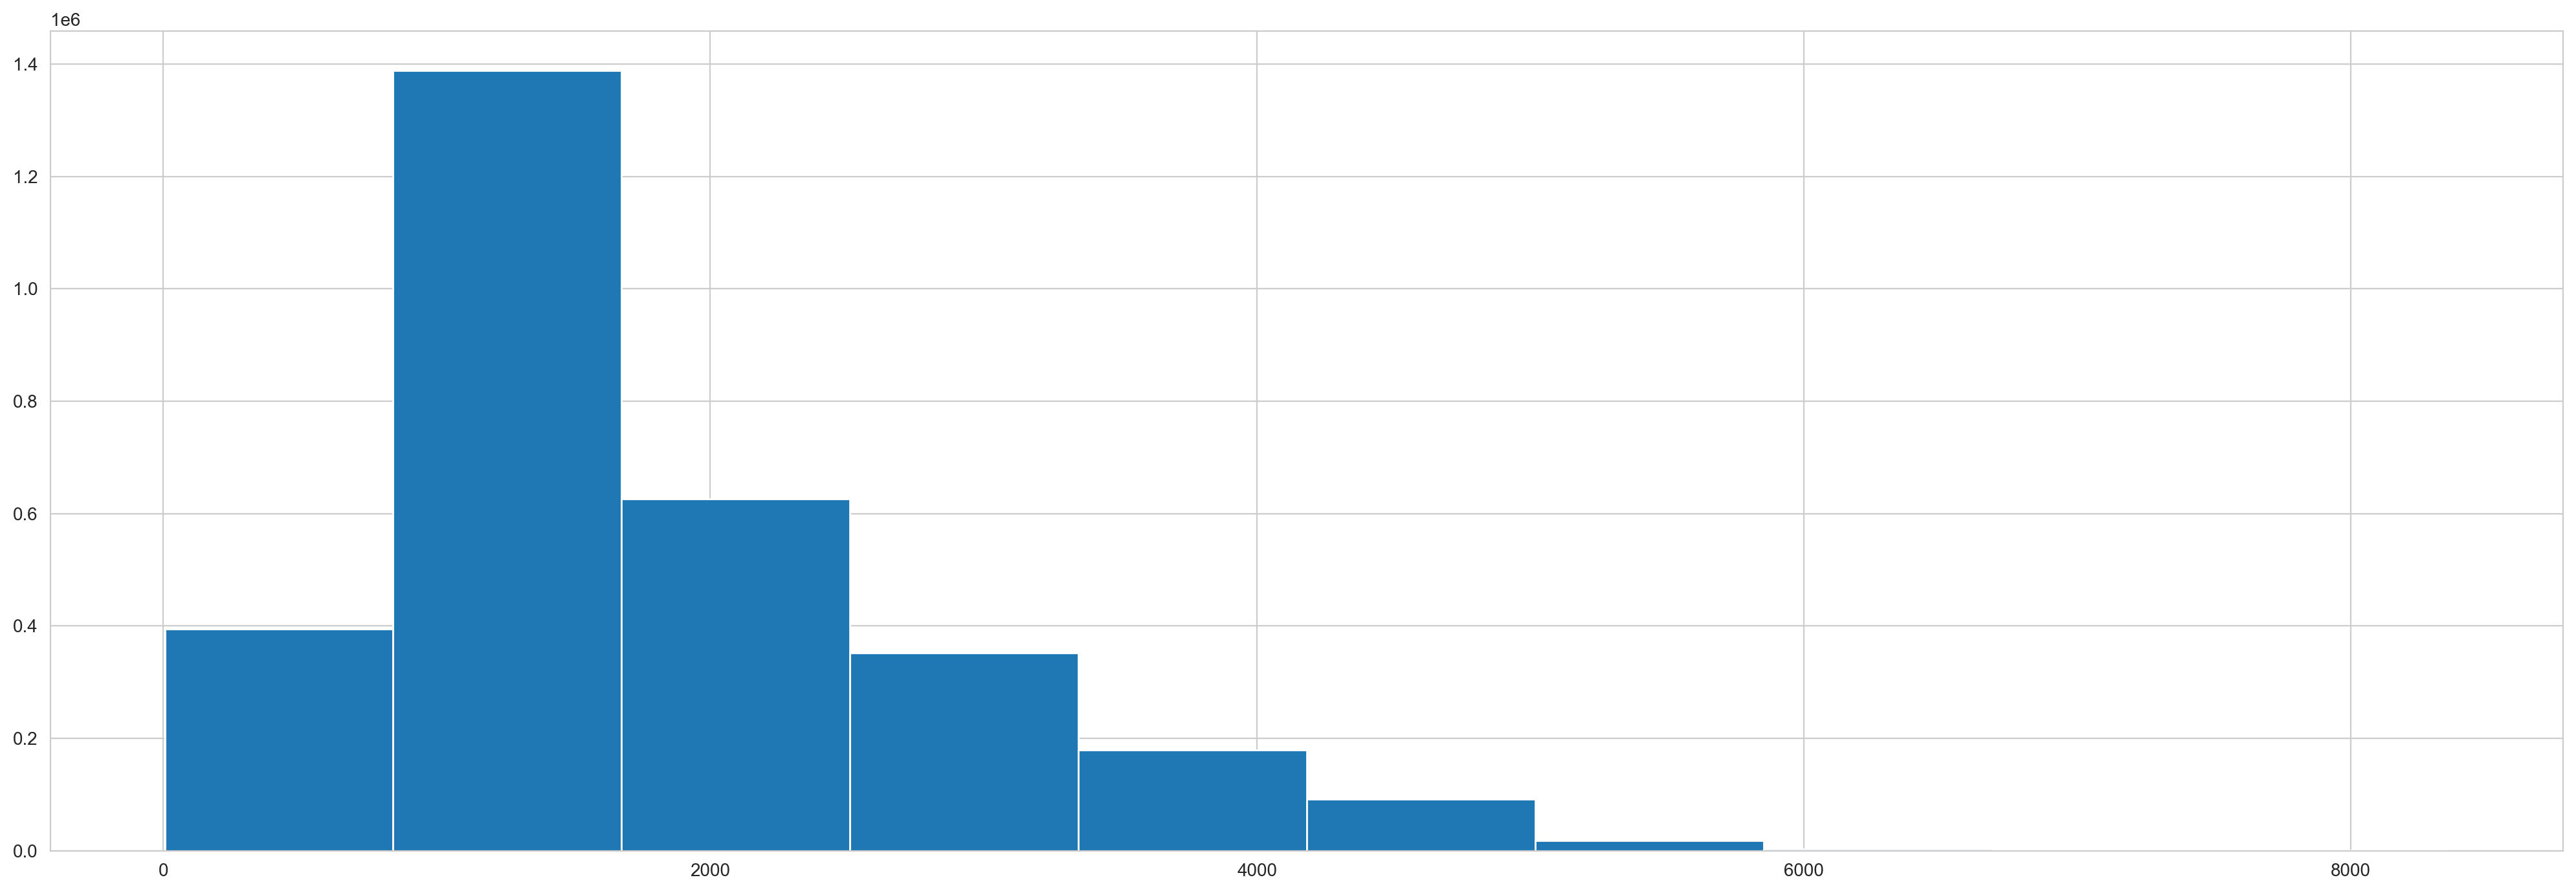

In [133]:
df['transactions'].hist()

In [134]:
df.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type_store', 'cluster', 'dcoilwtico', 'transactions', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')

In [135]:
import xgboost as xgb
import numpy as np

y_train = df["sales"]
X_train = df.drop(columns=["sales"])


df["log_sales"] = np.log1p(df["sales"])  # log(1 + sales)
y_train_logged = df["log_sales"]



model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist" 
)

model.fit(X_train, y_train_logged)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [136]:
# model2 = xgb.XGBRegressor(
#     n_estimators=1000,           
#     learning_rate=0.03,            
#     max_depth=8,                   
#     min_child_weight=5,          
#     gamma=0.1,                 
#     subsample=0.8,                 
#     colsample_bytree=0.8,
#     reg_alpha=0.1,                 
#     reg_lambda=1.0,              
#     random_state=42,
#     tree_method="hist", 
#     early_stopping_rounds=50     
# )
# model2.fit(X_train, y_train_logged, eval_set=[(X_train, y_train_logged)], verbose=100)

In [137]:
# import matplotlib.pyplot as plt
# from xgboost import plot_importance

# plt.figure(figsize=(12, 6))
# plot_importance(model2, max_num_features=20, importance_type='gain')  # or 'weight', 'cover'
# plt.title("Top 20 Feature Importances")
# plt.show()


<Figure size 1200x600 with 0 Axes>

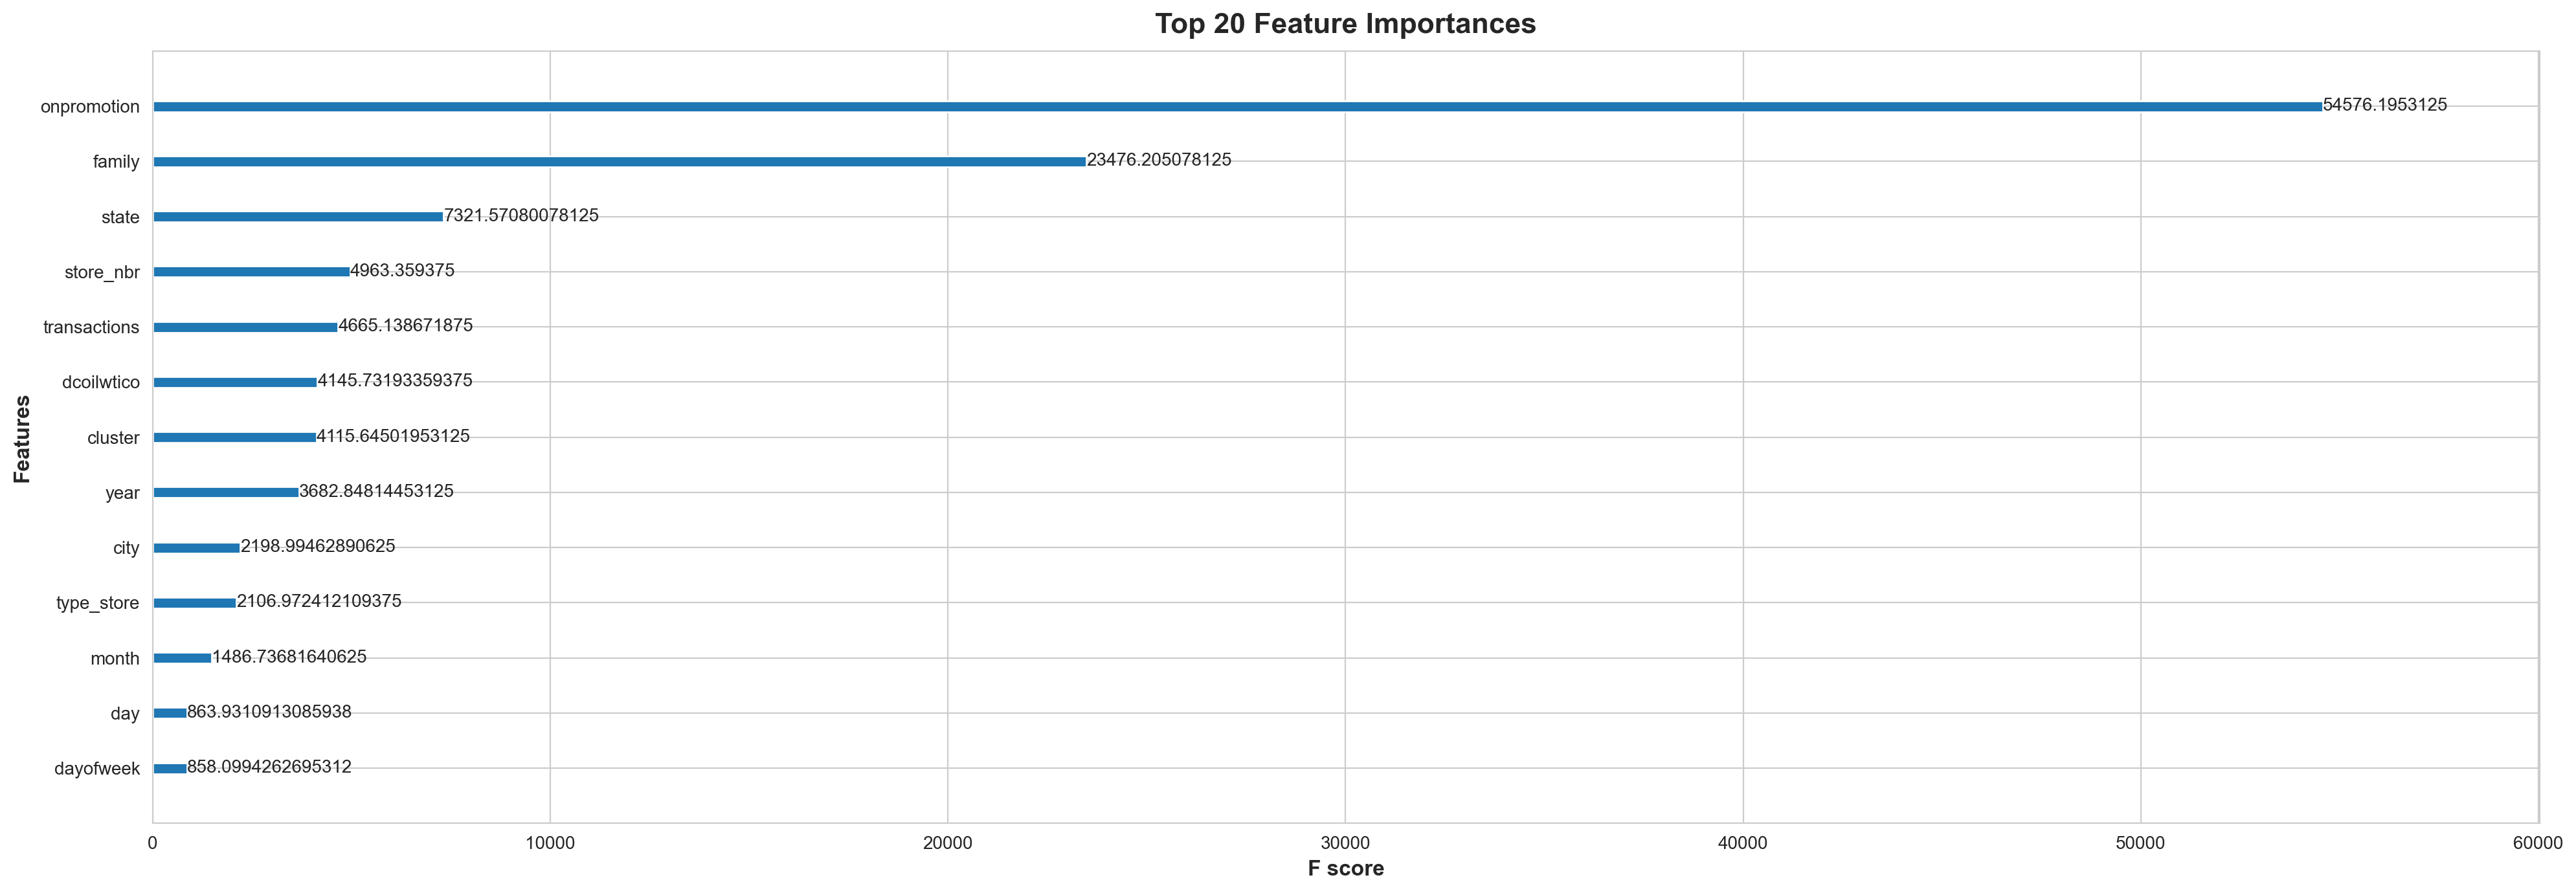

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(model, max_num_features=20, importance_type='gain')  # or 'weight', 'cover'
plt.title("Top 20 Feature Importances")
plt.show()

In [139]:
X_train

,store_nbr,family,onpromotion,city,state,type_store,cluster,dcoilwtico,transactions,year,month,day,dayofweek
0,1,0,0,18,12,3,13,93.14,2111.0,2013,1,1,1
1,1,1,0,18,12,3,13,93.14,2111.0,2013,1,1,1
2,1,2,0,18,12,3,13,93.14,2111.0,2013,1,1,1
3,1,3,0,18,12,3,13,93.14,2111.0,2013,1,1,1
4,1,4,0,18,12,3,13,93.14,2111.0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054211,54,28,0,5,10,2,3,47.57,802.0,2017,8,15,1
3054212,54,29,0,5,10,2,3,47.57,802.0,2017,8,15,1
3054213,54,30,76,5,10,2,3,47.57,802.0,2017,8,15,1
3054214,54,31,0,5,10,2,3,47.57,802.0,2017,8,15,1


In [140]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [141]:
test = pd.read_csv("./test.csv")
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [142]:
test["date"].min()

'2017-08-16'

In [143]:
test["date"].max()

'2017-08-31'

In [144]:
train["date"].max()

'2017-08-15'

In [145]:
test  = wrangle(holiday = holidays, oil=oil, stores=stores, transactions=transactions, train=None,test=test)

In [146]:
y_pred_log = model.predict(test)
y_pred_log = np.expm1(y_pred_log)  # Reverses log1p, ensures positivity

In [147]:
len(y_pred_log)

28512

In [148]:
submission = pd.DataFrame({
    'id': pd.read_csv('./test.csv')['id'],
    'sales': y_pred_log
})

submission.to_csv("submission.csv", index=False)